# **Análisis de datos**

### En este archivo analizaremos y representaremos los datos de la carpeta data que ya hemos limpiado previamente.

Comenzamos importando todas las dependecias necesarias para el correcto funcionamiento del documento, aunque primero hay que asegurarnos que las tenemos instaladas.

In [2]:
# Importamos librerías
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

El siguiente paso es cargar los datos.

In [3]:
# Cargamos los datos
equipos = pd.read_csv('../data/equipos_limpio.csv')
overall = pd.read_csv('../data/overall_limpio.csv')
partidos = pd.read_csv('../data/partidos_limpio.csv')

Ahora iremos analizando datos tabla por tabla.

## Tabla Equipos

Veamos que país es el que marca más goles. Podríamos hacer lo mismo con equipos en vez de países, pero son muchos equipos diferentes lo cual podría dificultar la visibilidad de la gráfica. 

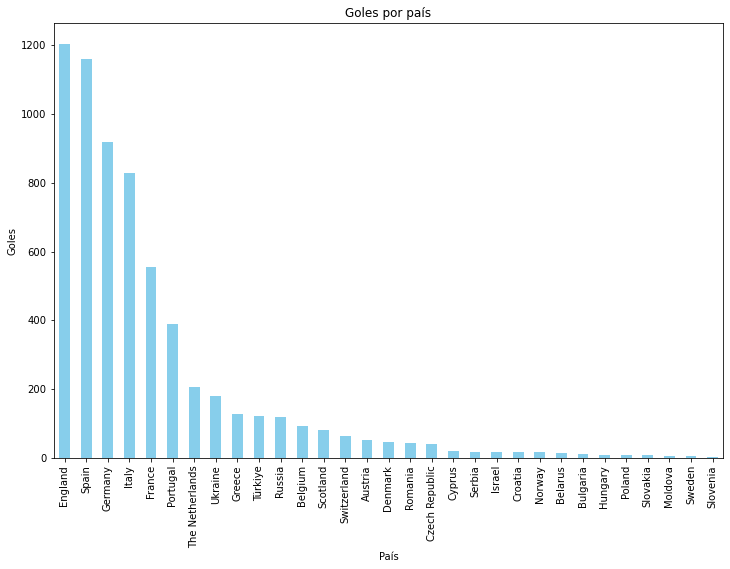

In [4]:
# Primero agrupamos por país 
goles_por_pais = equipos.groupby('Country')['Gls'].sum().sort_values(ascending=False)

# Graficamos
plt.figure(figsize=(12, 8))
goles_por_pais.plot(kind='bar', color='skyblue')
plt.title('Goles por país')
plt.xlabel('País')
plt.ylabel('Goles')
plt.show()

Podemos hacer lo mismo con la edad, las tarjetas rojas y las tarjetas amarillas. Sin embargo, no buscamos que nos sume todas las edades, buscamos que nos haga la media de las edades.

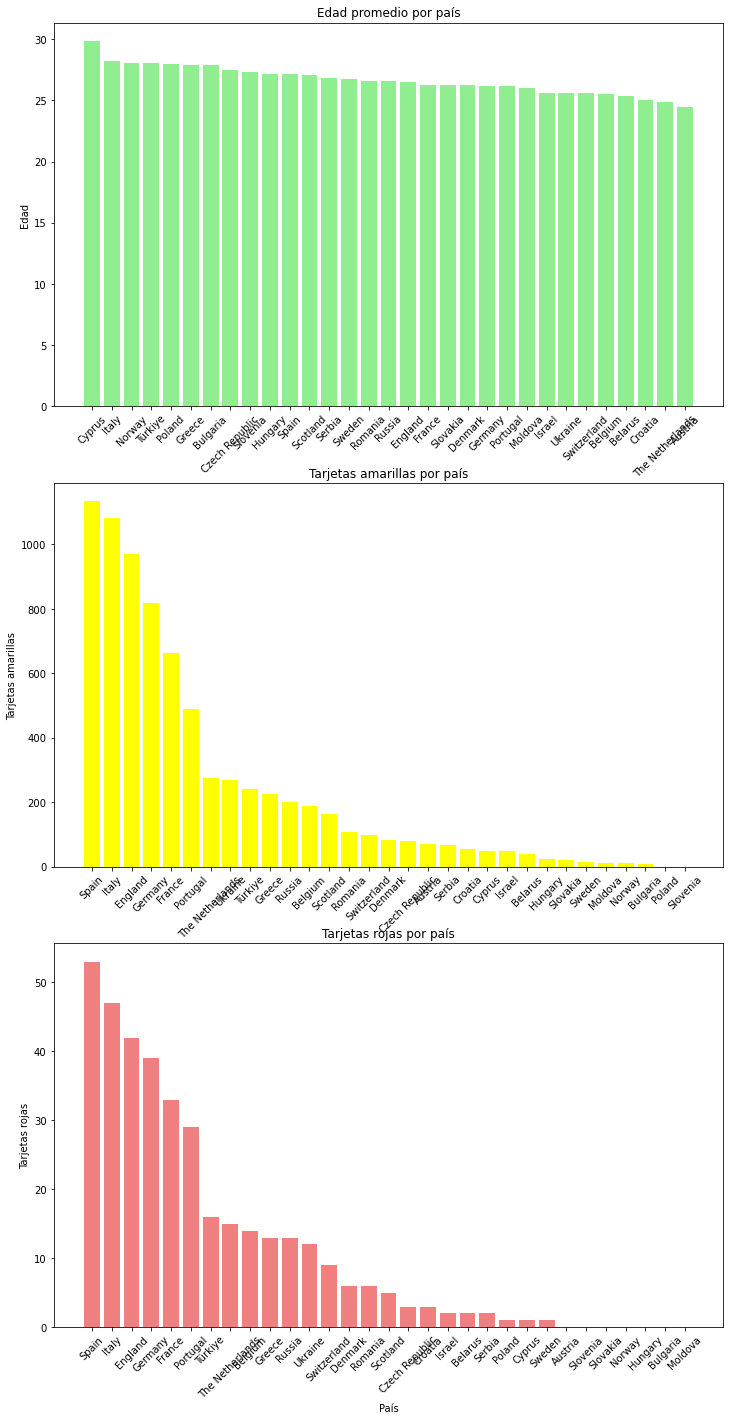

In [5]:
# Primero agrupamos 
edad_por_pais = equipos.groupby('Country')['Age'].mean().sort_values(ascending=False) # Edad promedio
crdy_por_pais = equipos.groupby('Country')['CrdY'].sum().sort_values(ascending=False)
crdr_por_pais = equipos.groupby('Country')['CrdR'].sum().sort_values(ascending=False)

# Graficamos
fg, ax = plt.subplots(3, 1, figsize=(12, 24))

ax[0].bar(edad_por_pais.index, edad_por_pais, color='lightgreen')
ax[0].set_title('Edad promedio por país')
ax[0].set_xlabel('País')
ax[0].set_ylabel('Edad')
ax[0].tick_params(axis='x', rotation=45)  # Rotar las etiquetas del eje x en 45 grados

ax[1].bar(crdy_por_pais.index, crdy_por_pais, color='yellow')
ax[1].set_title('Tarjetas amarillas por país')
ax[1].set_xlabel('País')
ax[1].set_ylabel('Tarjetas amarillas')
ax[1].tick_params(axis='x', rotation=45)  # Rotar las etiquetas del eje x en 45 grados

ax[2].bar(crdr_por_pais.index, crdr_por_pais, color='lightcoral')
ax[2].set_title('Tarjetas rojas por país')
ax[2].set_xlabel('País')
ax[2].set_ylabel('Tarjetas rojas')
ax[2].tick_params(axis='x', rotation=45)  # Rotar las etiquetas del eje x en 45 grados

Ahora pasaremos a la siguiente tabla.

## Tabla Overall

Podemos hacer un pie chart de los rankings que ha tenido España a lo largo de la historia de la UEFA.

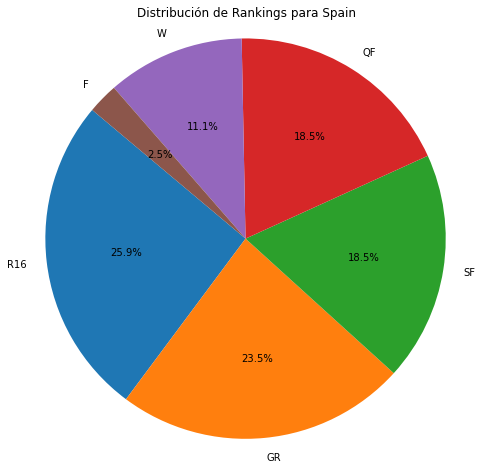

In [6]:
# Filtrar el DataFrame para obtener solo las filas correspondientes al país de interés
pais = 'Spain' 
datos_esp = overall[overall['Country'] == pais]

# Contar el número de ocurrencias de cada ranking
rankings = datos_esp['Rk'].value_counts()

# Crear el pie chart
plt.figure(figsize=(8, 8))
plt.pie(rankings, labels=rankings.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Rankings para ' + pais)
plt.axis('equal')
plt.show()

También podemos ver qué país ha ganado más puntos.

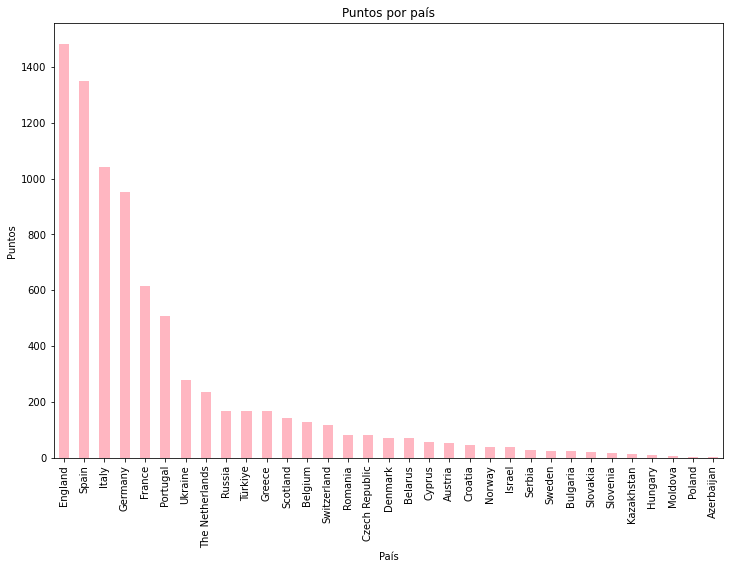

In [7]:
# Primero agrupamos por país 
goles_por_pais = overall.groupby('Country')['Pts'].sum().sort_values(ascending=False)

# Graficamos
plt.figure(figsize=(12, 8))
goles_por_pais.plot(kind='bar', color='lightpink')
plt.title('Puntos por país')
plt.xlabel('País')
plt.ylabel('Puntos')
plt.show()

Otra idea es ver cual es la media de puntos de un país por cada temporada. 

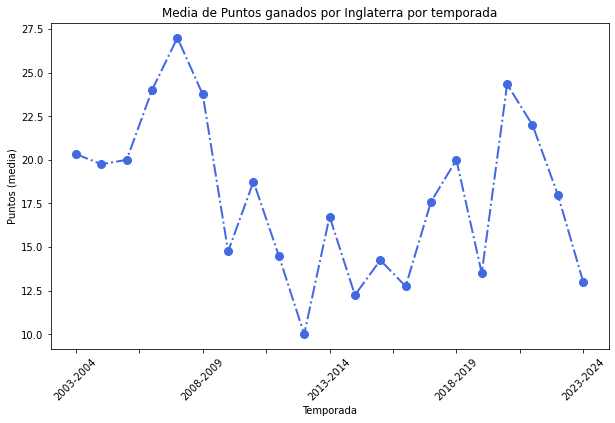

In [8]:
# Filtrar los datos solo para Inglaterra
datos_inglaterra = overall[overall['Country'] == 'England']

# Agrupar por temporada y calulamos la media de los puntos ganados por Inglaterra en cada temporada
puntos_inglaterra_por_temporada = datos_inglaterra.groupby('Season')['Pts'].mean()

# Graficar los puntos ganados por Inglaterra a lo largo de los años
plt.figure(figsize=(10, 6))
puntos_inglaterra_por_temporada.plot(color='royalblue', marker='o', linestyle='-.', linewidth=2, markersize=8)
plt.title('Media de Puntos ganados por Inglaterra por temporada')
plt.xlabel('Temporada')
plt.ylabel('Puntos (media)')
plt.xticks(rotation=45)
plt.show()

Pasamos a la última tabla

## Tabla Partidos

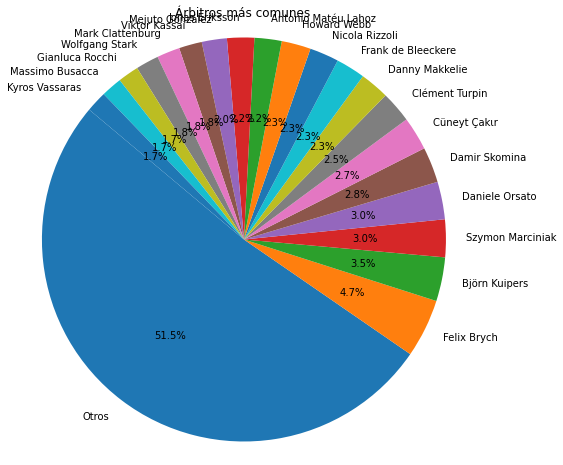

In [9]:
arbitros = partidos['Referee']

# Hacemos que si un árbitro ha pitado menos de 10 partidos, se agrupe en la categoría 'Otros'
otros = arbitros.value_counts()[arbitros.value_counts() < 10].index
arbitros.replace(otros, 'Otros', inplace=True)

# Crear el pie chart
plt.figure(figsize=(8, 8))
plt.pie(arbitros.value_counts(), labels=arbitros.value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Árbitros más comunes')
plt.axis('equal')
plt.show()